In [1]:
#7.2.4 ARIMA(Autoregressive Integrated Moving Average) 모델

e:\anaconda3\envs\tensorflow2.0\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
e:\anaconda3\envs\tensorflow2.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
e:\anaconda3\envs\tensorflow2.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.350
Method:                       css-mle   S.D. of innovations             66.436
Date:                Thu, 24 Dec 2020   AIC                            408.699
Time:                        15:39:05   BIC                            419.587
Sample:                    02-01-1991   HQIC                           412.458
                         - 12-01-1993                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4256      3.774      3.292      0.001       5.028      19.823
ar.L1.D.Sales    -1.0850      0.188     -5.764      0.000      -1.454      -0.716
ar.L2.D.Sales    -0.6688      0.283     

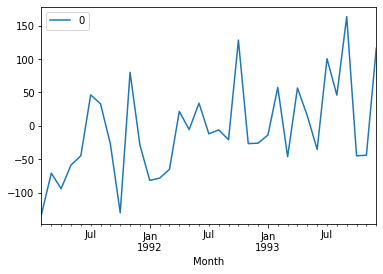

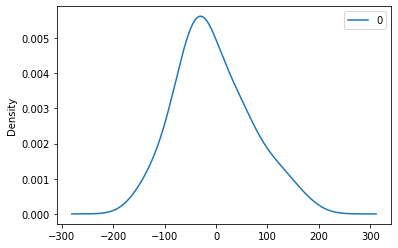

                0
count   35.000000
mean    -5.569215
std     70.272669
min   -132.525593
25%    -45.563710
50%    -20.763415
75%     39.933246
max    163.552180


In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
series = read_csv('../chap7/data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

e:\anaconda3\envs\tensorflow2.0\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


predicted=354.377780, expected=346.300000
predicted=288.627352, expected=329.700000
predicted=382.817972, expected=445.400000
predicted=339.543951, expected=325.900000
predicted=392.897234, expected=449.300000
predicted=354.487892, expected=411.300000
predicted=452.200121, expected=417.400000
predicted=406.806148, expected=545.500000
predicted=430.162049, expected=477.600000
predicted=492.745304, expected=687.000000
predicted=493.604459, expected=435.300000
predicted=657.397245, expected=587.300000
predicted=522.091043, expected=676.900000
Test MSE: 8074.992


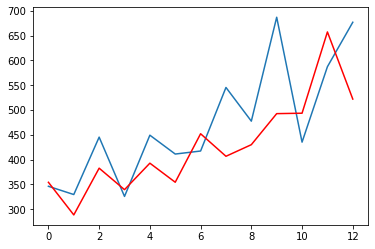

In [4]:
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
 
series = read_csv('../chap7/data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [5]:
# 7.4.1 RNN Cell

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [7]:
tf.random.set_seed(22)
np.random.seed(22)
assert tf.__version__.startswith('2.')

batch_size = 128
total_words = 10000
max_review_len = 80
embedding_len = 100

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(10000).batch(batch_size, drop_remainder=True)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size, drop_remainder=True)
print('x_train_shape:', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test_shape:', x_test.shape)

sample = next(iter(test_data))
print(sample[0].shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\jyseo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\jyseo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

x_train_shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test_shape: (25000, 80)
(128, 80)


In [9]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units): 
        super(RNN_Build, self).__init__()
        
        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.RNNCell0 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.RNNCell1 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.outlayer = tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0  
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [10]:
import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units) 
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 5s 27ms/step - loss: 0.6249 - accuracy: 0.6134
Epoch 2/4
195/195 [==============================] - 8s 42ms/step - loss: 0.3543 - accuracy: 0.8494 - val_loss: 0.4064 - val_accuracy: 0.8224
Epoch 3/4
195/195 [==============================] - 5s 27ms/step - loss: 0.1926 - accuracy: 0.9270
Epoch 4/4
195/195 [==============================] - 7s 37ms/step - loss: 0.0828 - accuracy: 0.9709 - val_loss: 0.6795 - val_accuracy: 0.7970


In [11]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.0260, accuracy: 99.3550%
테스트 데이터셋 평가...
loss=0.6795, accuracy: 79.7035%
시간: 40.00159311294556


In [12]:
# 7.4.2 RNN층(Layer)

In [13]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.rnn = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(units, dropout=0.5, return_sequences=True),
            tf.keras.layers.SimpleRNN(units, dropout=0.5)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

In [14]:
import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 12s 61ms/step - loss: 0.5376 - accuracy: 0.7124
Epoch 2/4
195/195 [==============================] - 15s 79ms/step - loss: 0.3508 - accuracy: 0.8511 - val_loss: 0.4648 - val_accuracy: 0.8200
Epoch 3/4
195/195 [==============================] - 12s 63ms/step - loss: 0.2842 - accuracy: 0.8864
Epoch 4/4
195/195 [==============================] - 16s 81ms/step - loss: 0.2370 - accuracy: 0.9079 - val_loss: 0.4664 - val_accuracy: 0.8226


In [15]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1137, accuracy: 96.3542%
테스트 데이터셋 평가...
loss=0.4664, accuracy: 82.2636%
시간: 69.2024393081665


In [16]:
# 7.5.2 LSTM Cell

In [17]:
class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    

            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)

        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [18]:
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 18s 91ms/step - loss: 0.4792 - accuracy: 0.7595
Epoch 2/4
195/195 [==============================] - 28s 145ms/step - loss: 0.3136 - accuracy: 0.8711 - val_loss: 0.3617 - val_accuracy: 0.8397
Epoch 3/4
195/195 [==============================] - 20s 103ms/step - loss: 0.2613 - accuracy: 0.8954
Epoch 4/4
195/195 [==============================] - 27s 137ms/step - loss: 0.2258 - accuracy: 0.9129 - val_loss: 0.4071 - val_accuracy: 0.8243


In [20]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1755, accuracy: 93.8301%
테스트 데이터셋 평가...
loss=0.4071, accuracy: 82.4319%
시간: 235.93058919906616


In [21]:
#7.5.3 LSTM Layer

In [22]:
class LSTM_Build(tf.keras.Model):

    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.LSTM(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.LSTM(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)

        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [23]:
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 24s 124ms/step - loss: 0.4885 - accuracy: 0.7488
Epoch 2/4
195/195 [==============================] - 37s 192ms/step - loss: 0.3153 - accuracy: 0.8706 - val_loss: 0.3548 - val_accuracy: 0.8423
Epoch 3/4
195/195 [==============================] - 23s 116ms/step - loss: 0.2572 - accuracy: 0.8968
Epoch 4/4
195/195 [==============================] - 35s 179ms/step - loss: 0.2148 - accuracy: 0.9183 - val_loss: 0.3987 - val_accuracy: 0.8340


In [24]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1413, accuracy: 95.6090%
테스트 데이터셋 평가...
loss=0.3987, accuracy: 83.4014%
시간: 158.35215830802917


In [25]:
#7.6.2 GRU Cell

In [26]:
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    
            out0, state0 = self.RNNCell0(word, state0, training)   
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)

        return prob

In [27]:
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 17s 86ms/step - loss: 0.5182 - accuracy: 0.7264
Epoch 2/4
195/195 [==============================] - 25s 129ms/step - loss: 0.3262 - accuracy: 0.8627 - val_loss: 0.3595 - val_accuracy: 0.8411
Epoch 3/4
195/195 [==============================] - 17s 90ms/step - loss: 0.2680 - accuracy: 0.8926
Epoch 4/4
195/195 [==============================] - 24s 121ms/step - loss: 0.2264 - accuracy: 0.9123 - val_loss: 0.3955 - val_accuracy: 0.8282


In [28]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1771, accuracy: 94.1747%
테스트 데이터셋 평가...
loss=0.3955, accuracy: 82.8245%
시간: 162.60217928886414


In [29]:
#7.6.3 GRU Layer

In [30]:
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.GRU(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.GRU(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [31]:
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 23s 120ms/step - loss: 0.5033 - accuracy: 0.7383
Epoch 2/4
195/195 [==============================] - 39s 201ms/step - loss: 0.3166 - accuracy: 0.8670 - val_loss: 0.3613 - val_accuracy: 0.8435
Epoch 3/4
195/195 [==============================] - 24s 124ms/step - loss: 0.2569 - accuracy: 0.8970
Epoch 4/4
195/195 [==============================] - 39s 200ms/step - loss: 0.2165 - accuracy: 0.9168 - val_loss: 0.4122 - val_accuracy: 0.8338


In [32]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1378, accuracy: 95.5889%
테스트 데이터셋 평가...
loss=0.4122, accuracy: 83.3814%
시간: 190.3636932373047


In [33]:
#7.8.2 양방향 RNN 예시

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb

n_unique_words = 10000 
maxlen = 200
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Epoch 1/4
196/196 [==============================] - 156s 796ms/step - loss: 0.4357 - accuracy: 0.7910 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/4
196/196 [==============================] - 162s 826ms/step - loss: 0.2391 - accuracy: 0.9106 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/4
196/196 [==============================] - 165s 844ms/step - loss: 0.1733 - accuracy: 0.9392 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/4
196/196 [==============================] - 173s 883ms/step - loss: 0.1379 - accuracy: 0.9528 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [36]:
loss, acc = model.evaluate(x_train, y_train, batch_size=384, verbose=1)
print ('Training accuracy', model.metrics_names, acc)
print ('Training accuracy', model.metrics_names, loss)
loss, acc = model.evaluate(x_test, y_test, batch_size=384, verbose=1)
print ('Testing accuracy', model.metrics_names, acc)
print ('Testing accuracy', model.metrics_names, loss)

66/66 [==============================] - 21s 314ms/step - loss: 0.0870 - accuracy: 0.9722
Training accuracy ['loss', 'accuracy'] 0.9721599817276001
Training accuracy ['loss', 'accuracy'] 0.08702150732278824
66/66 [==============================] - 21s 325ms/step - loss: 0.3949 - accuracy: 0.8616
Testing accuracy ['loss', 'accuracy'] 0.8615999817848206
Testing accuracy ['loss', 'accuracy'] 0.3949168622493744
